In [111]:
import numpy as np
from logging import Logger

%matplotlib inline
import sys, os
import matplotlib.pyplot as plt

base_path = 'data_fold_dyke_fault/'

files = os.listdir(base_path+'model/')

fdf_xz_model_files = [base_path+'model/'+x for x in files if x.find('xz') != -1]
fdf_xz_seismic_r5_files = [base_path+'seismic_r5/'+x for x in files if x.find('xz') != -1]
fdf_xz_seismic_r8_files = [base_path+'seismic_r8/'+x for x in files if x.find('xz') != -1]
fdf_xz_seismic_r10_files = [base_path+'seismic_r10/'+x for x in files if x.find('xz') != -1]
fdf_xz_seismic_r15_files = [base_path+'seismic_r15/'+x for x in files if x.find('xz') != -1]

fdf_yz_model_files = [base_path+'model/'+x for x in files if x.find('yz') != -1]
fdf_yz_seismic_r5_files = [base_path+'seismic_r5/'+x for x in files if x.find('yz') != -1]
fdf_yz_seismic_r8_files = [base_path+'seismic_r8/'+x for x in files if x.find('yz') != -1]
fdf_yz_seismic_r10_files = [base_path+'seismic_r10/'+x for x in files if x.find('yz') != -1]
fdf_yz_seismic_r15_files = [base_path+'seismic_r15/'+x for x in files if x.find('yz') != -1]

print("fdf numfiles: xz(model: ", len(fdf_xz_model_files),
      ", seismic:", len(fdf_xz_seismic_files),")",
      "| yz(model:", len(fdf_yz_model_files), 
      ", seismic:", len(fdf_yz_seismic_files),")")



fdf numfiles: xz(model:  1600 , seismic: 1600 ) | yz(model: 1200 , seismic: 1200 )


In [130]:
target_width = 200;

out_dir = 'data_mega/'
if not os.path.exists(out_dir):
    os.makedirs(out_dir)

fdf_xz_size = (280, 200)
fdf_yz_size = (400, 200)
    
    
def makeCropFlipSet(data):
    left = data[:, 0:target_width]
    left_flip = np.fliplr(left)
    right = data[:, -target_width:]
    right_flip = np.fliplr(right)
    return left, left_flip, right, right_flip
    
def runCropFlipOnPath(files, image_size, stub):
    i = 1
    for file in files:
        data = np.load(file)
        left, left_flip, right, right_flip = makeCropFlipSet(data)
        name = out_dir+stub
        np.save(name+'_L_'+str(i), left)
        np.save(name+'_LF_'+str(i), left_flip)
        np.save(name+'_R_'+str(i), right)
        np.save(name+'_RF_'+str(i), right_flip)
        i=i+1

(200, 200) (200, 200) (200, 200) (200, 200)


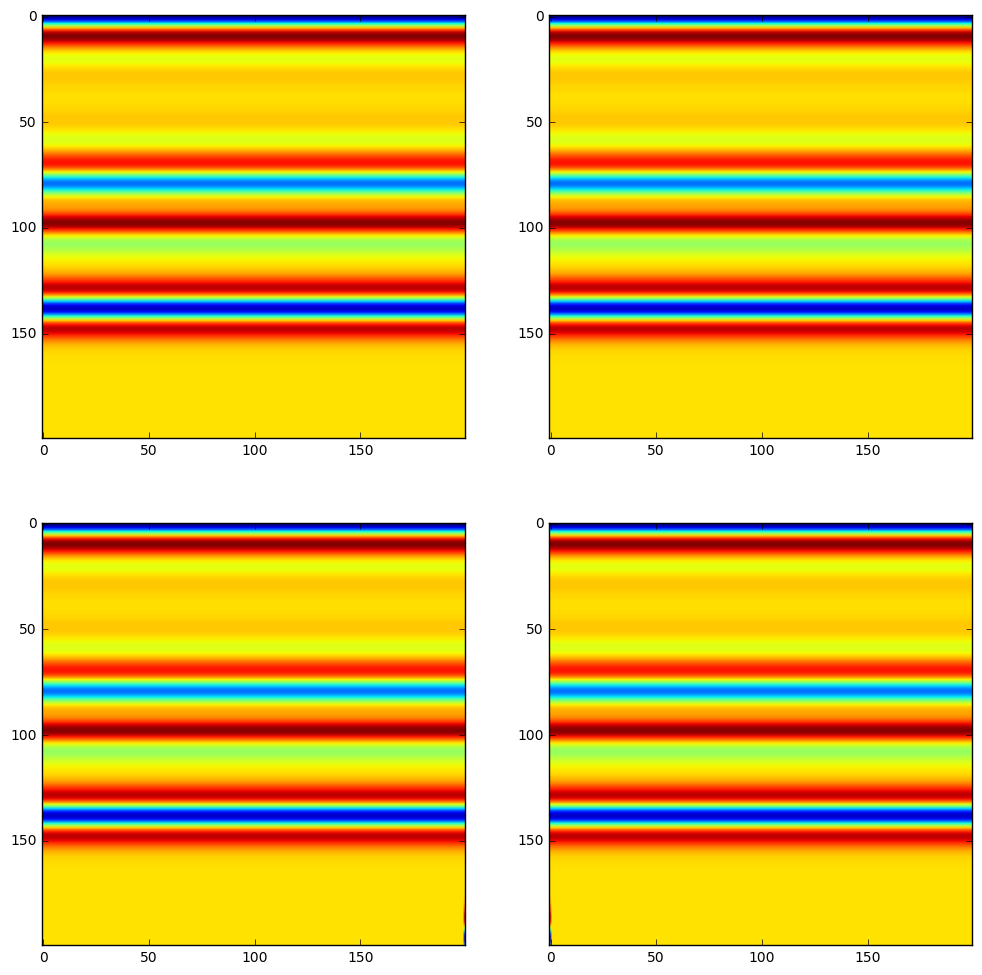

In [131]:
data = np.load('data_fold_dyke_fault/seismic_r10/out_0001_xz0.npy')
left, left_flip, right, right_flip = makeCropFlipSet(data)
print(left.shape, left_flip.shape, right.shape, right_flip.shape)

plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.imshow(left)
plt.subplot(2,2,2)
plt.imshow(left_flip)
plt.subplot(2,2,3)
plt.imshow(right)
plt.subplot(2,2,4)
plt.imshow(right_flip)

In [132]:

# runCropFlipOnPath(fdf_xz_model_files, fdf_xz_size, 'fdf_model_xz')
# runCropFlipOnPath(fdf_xz_seismic_r5_files, fdf_xz_size, 'fdf_seismic_r5_xz')
# runCropFlipOnPath(fdf_xz_seismic_r8_files, fdf_xz_size, 'fdf_seismic_r8_xz')
runCropFlipOnPath(fdf_xz_seismic_r10_files, fdf_xz_size, 'fdf_seismic_r10_xz')
# runCropFlipOnPath(fdf_xz_seismic_r15_files, fdf_xz_size, 'fdf_seimic_r15_xz')
    
    
# runCropFlipOnPath(fdf_yz_model_files, fdf_yz_size, 'fdf_model_yz')
# runCropFlipOnPath(fdf_yz_seismic_r5_files, fdf_yz_size, 'fdf_seismic_r5_yz')
# runCropFlipOnPath(fdf_yz_seismic_r8_files, fdf_yz_size, 'fdf_seismic_r8_yz')
runCropFlipOnPath(fdf_yz_seismic_r10_files, fdf_yz_size, 'fdf_seismic_r10_yz')
# runCropFlipOnPath(fdf_yz_seismic_r15_files, fdf_yz_size, 'fdf_seismic_r15_yz')
    

In [ ]:
files = os.listdir('data_GBasin_simplified/model/')
gba_size = (496, 200)
gba_size = (376, 200)

gba_xz_model_files = ['data_GBasin_simplified/model/'+x for x in files if x.find('xz') != -1]
gba_yz_seismic_files = ['data_GBasin_simplified/seismic/'+x for x in files if x.find('yz') != -1]

gba_xz_model_files = ['data_GBasin_simplified/model/'+x for x in files if x.find('xz') != -1]
gba_yz_seismic_files = ['data_GBasin_simplified/seismic/'+x for x in files if x.find('yz') != -1]

print("gda numfiles: xz(model: ", len(gba_xz_model_files),
      ", seismic:", len(gba_yz_seismic_files),")",
      "| yz(model:", len(gba_xz_model_files), 
      ", seismic:", len(gba_yz_seismic_files),")")

In [ ]:
data = np.transpose(np.load(fdf_yz_model_files[0]).reshape(fdf_yz_size))
left, left_flip, right, right_flip = makeCropFlipSet(data)

plt.subplot(2,2,1)
plt.imshow(left)
plt.subplot(2,2,2)
plt.imshow(left_flip)
plt.subplot(2,2,3)
plt.imshow(right)
plt.subplot(2,2,4)
plt.imshow(right_flip)


'fdf_seismic_r10_xz_L_632'

In [ ]:
runCropFlipOnPath(fdf_xz_model_files, fdf_xz_size, 'fdf_model_xz')
runCropFlipOnPath(fdf_xz_seismic_r5_files, fdf_xz_size, 'fdf_sesimic_r5_xz')
runCropFlipOnPath(fdf_xz_seismic_r8_files, fdf_xz_size, 'fdf_sesimic_r8_xz')
runCropFlipOnPath(fdf_xz_seismic_r10_files, fdf_xz_size, 'fdf_sesimic_r10_xz')
runCropFlipOnPath(fdf_xz_seismic_r15_files, fdf_xz_size, 'fdf_sesimic_r15_xz')
    
    
runCropFlipOnPath(fdf_yz_model_files, fdf_yz_size, 'fdf_model_yz')
runCropFlipOnPath(fdf_yz_seismic_r5_files, fdf_yz_size, 'fdf_sesimic_r5_yz')
runCropFlipOnPath(fdf_yz_seismic_r8_files, fdf_yz_size, 'fdf_sesimic_r8_yz')
runCropFlipOnPath(fdf_yz_seismic_r10_files, fdf_yz_size, 'fdf_sesimic_r10_yz')
runCropFlipOnPath(fdf_yz_seismic_r15_files, fdf_yz_size, 'fdf_sesimic_r15_yz')